## Regresión Logística - Reseñas de películas en IMDB
Elegí el dataset de reseñas de películas de IMDb(https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), que contiene 50.000 opiniones clasificadas como:
- `positive` (positiva)
- `negative` (negativa)

La Regresión Logística es ideal para este tipo de problemas porque:
- Permite clasificar elementos en dos categorías (positivo o negativo)
- Es rápida de entrenar y fácil de interpretar
- Funciona bien con vectores de texto convertidos mediante `TfidfVectorizer`

Este modelo puede ser útil en escenarios reales como:
- Filtrar reseñas automáticas
- Detectar opiniones negativas en productos
- Predecir la percepción de los usuarios a partir de comentarios
- Me pareció que este tipo de modelo también podría ser útil en mi proyecto final (Leoteca Digital), donde se trabajan con reseñas y comentarios de libros. Un sistema que pueda detectar automáticamente si una reseña es positiva o negativa puede ser muy útil para mejorar la experiencia de usuario o moderar contenido.


### Importar librerías

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt





### Cargar el dataset

In [3]:
df = pd.read_csv("IMDB.csv")
df.head(8)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative


## Descripción general del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### Verificar valores nulos

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

## Conversión de etiquetas de texto a valores numéricos

- Se asigna el valor **1** a las reseñas positivas
- Se asigna el valor **0** a las reseñas negativas

Esto permite que el modelo entienda el problema como una tarea de clasificación binaria.


In [7]:
# Convertir etiquetas a 0 y 1
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


## Vectorización del texto (TfidfVectorizer)

Los modelos de machine learning no entienden texto crudo. Por eso, es necesario convertir cada reseña (`review`) en un vector numérico que represente su contenido.

Para eso utilizamos `TfidfVectorizer`, una técnica que convierte palabras en números según su frecuencia e importancia, eliminando palabras comunes sin valor predictivo.

Ajustamos el vectorizador a las reseñas y lo usamos para transformar los textos en vectores que puedan ser procesados por el modelo.


In [ ]:
# crear el vectorizador
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
# transformar los textos en vectores
X = vectorizer.fit_transform(df["review"]) # matriz sparse con las reseñas vectorizadas
y = df["label"]

## Dividir los datos para entrenamiento y prueba
Para evaluar mejor el rendimiento del modelo con datos que no vió

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenar el modelo de Regresión Logística

- Entrenar el modelo con las reseñas vectorizadas (`X`) y sus etiquetas (`y`).  
- Ajustar `max_iter=1000` para asegurar de que el modelo tenga suficiente margen para converger correctamente.


In [18]:
# crear el modelo
modelo = LogisticRegression(max_iter=1000)
#entrenar con los datos de entrenamiento
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Hacer una predicción con una nueva reseña manualmente

- Como el modelo espera texto vectorizado, primero hay que transformar el nuevo texto con el `vectorizer`
- Se pasa una nueva reseña y el modelo nos dice si es positiva `1`, o negativa `0`


In [12]:
nueva_resena = ["This movie was truly a gem, it's been a long time since I've seen something that moved me so much, I'm going to recommend it to my family!"]

# vectorizar
nueva_res_vect = vectorizer.transform(nueva_resena)

In [13]:
# hacer la predicción
resultado = modelo.predict(nueva_res_vect)

print("Predicción:", "Positiva" if resultado[0] == 1 else "Negativa")

Predicción: Positiva


In [15]:
resena_malita = ["The truth is that I have never seen an abomination like this. It made me want to rip my eyes out and stick them in a blender."]
malita_vect = vectorizer.transform(resena_malita)
resultado_malita = modelo.predict(malita_vect)
print("Predicción: ", "Positiva" if resultado_malita[0] == 1 else "Negativa")

Predicción:  Negativa


## Predecir usando los datos de prueba

In [20]:
y_predict = modelo.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_predict))


Precisión del modelo: 0.8896


## Visualización de las predicciones usando reducción de dimensionalidad (PCA)

Como los vectores generados por TfidfVectorizer tienen miles de dimensiones, necesitamos reducirlos a solo 2 para poder graficarlos.

Para esto utilizamos el método **PCA (Análisis de Componentes Principales)**.  
Este proceso conserva las características más importantes del dataset en solo dos ejes (X e Y).

Luego, graficamos los puntos con diferentes colores según si el modelo los clasificó como positivos o negativos.


In [22]:
# Asegurarnos de que X_test sea array
X_test_array = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [25]:
# Para visualizar mejor elijo 1000 índices aleatorios 
np.random.seed(42)
indices = np.random.choice(len(X_test_array), size=1000, replace=False)

# Filtrar los datos para esos índices
X_sample = X_test_array[indices]
y_sample = y_test.values[indices]
y_pred_sample = y_predict[indices]

In [26]:
# Reducir con PCA
pca = PCA(n_components=2)
X_sample_pca = pca.fit_transform(X_sample)

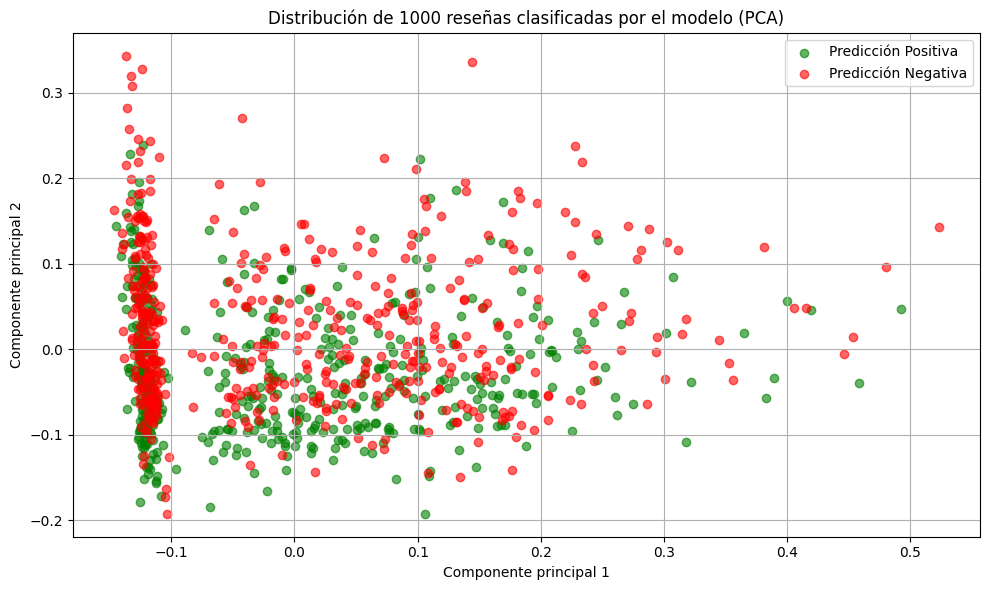

In [27]:
# Graficar
plt.figure(figsize=(10,6))
plt.scatter(X_sample_pca[y_pred_sample == 1][:, 0], X_sample_pca[y_pred_sample == 1][:, 1], 
            color='green', label='Predicción Positiva', alpha=0.6)
plt.scatter(X_sample_pca[y_pred_sample == 0][:, 0], X_sample_pca[y_pred_sample == 0][:, 1], 
            color='red', label='Predicción Negativa', alpha=0.6)

plt.title("Distribución de 1000 reseñas clasificadas por el modelo (PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Gráfico de aciertos y errores que tuvo el modelo


In [28]:
# Determinar cuáles son aciertos y errores
aciertos = y_sample == y_pred_sample
errores = ~aciertos

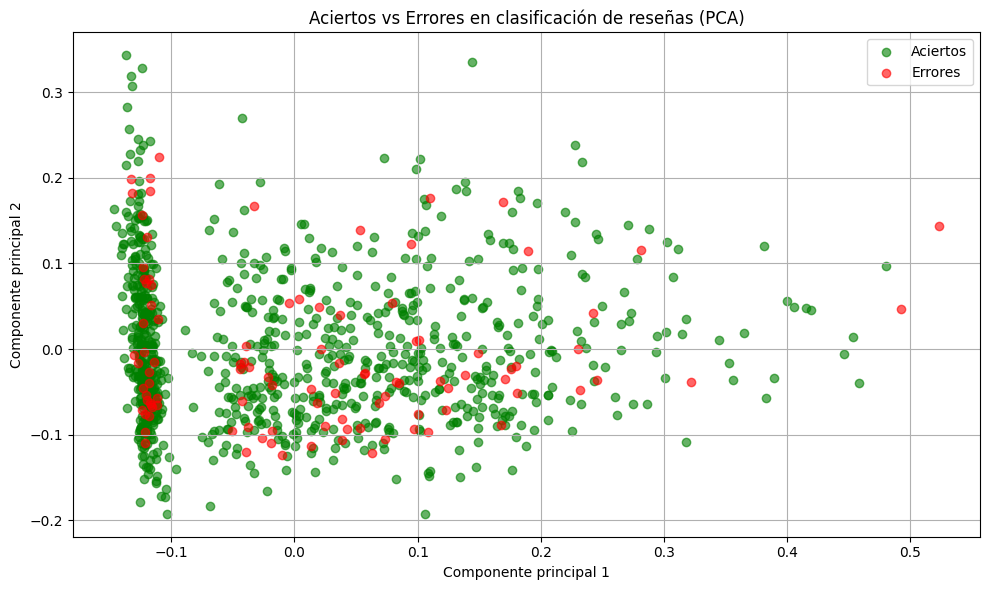

In [29]:
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X_sample_pca[aciertos][:, 0], X_sample_pca[aciertos][:, 1], 
            color='green', label='Aciertos', alpha=0.6)
plt.scatter(X_sample_pca[errores][:, 0], X_sample_pca[errores][:, 1], 
            color='red', label='Errores', alpha=0.6)

plt.title("Aciertos vs Errores en clasificación de reseñas (PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusiones
El modelo logró una buena precisión y fue capaz de identificar correctamente la mayoría de las reseñas.  
